### Akhil Juneja 7015523 <br> Aashita Balan 7012436

In [79]:
import numpy as np
import matplotlib.pyplot as plt

### Loading data
We first load the problem data.

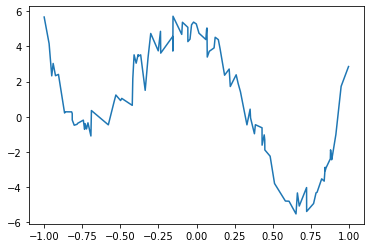

In [80]:
def load_data():
    xy = np.loadtxt('data/y_target.csv', delimiter=",")
    return xy[:,0],xy[:,1]

x,y = load_data()
plt.plot(x,y)

In [65]:
def generate_features(x, deg):
    '''This function generates a design matrix of features for each input point in x
    
    @param x: the input points
    @param deg: the maximum degree of the polynomial basis.
    @return : the design matrix X of dimensions NxD+1, so that the i-th row is the feature vector of the i-th input.
              Each value X_id = f_d(x_i) for the Chebyshev polynomial (of 1st kind) with degree d.
    '''
    mat = []
    for i in x:
        row=[]
        for j in range(deg+1):
            coef = [0]*(deg+1)
            coef[j]=1
            row.append(np.polynomial.chebyshev.chebval(i, coef))
        mat.append(row)
        
    return np.asarray(mat)
            

D = 4
X = generate_features(x, D)
print(X.shape)


(100, 5)


In [81]:
'''
def fit(X,y):
    Learns the coefficients of each of the features in the provided matrix that best predicts y.
    @param X: the design matrix of features, one feature per row
    @param y: the vector of the dependent variable (labels)
    @return: vector of coefficients
    
    raise NotImplementedError()
    '''

def fit_cheb(x,y,D):
    '''Learns the coefficients of each of the features in the provided matrix that best predicts y.
    @param x: the input points
    @param D: maximum depgree of chebyshev polynomials
    @param y: the vector of the dependent variable (labels)
    @return: vector of coefficients
    '''
    coef = np.polynomial.chebyshev.chebfit(x, y, D)
    return coef

def predict_cheb(X,w):
    
    pred = np.multiply(X,w)
    return (pred.sum(axis=1))

w = fit_cheb(x, y, D)
#Check the size of your results:
w, X.shape

(array([ 0.99668433, -1.96466465, -0.12886999,  1.0131296 ,  3.74139865]),
 (100, 5))

In [82]:
from utilities import split_data

# Now generate a split of the full data into a taining/.testing dataset.
# The result is an object with named attributes x_trn, x_tst, t_trn, and y_tst.
data = split_data(x, y)

In [83]:
# Fit on the train data and evalute the RSS on the test data

def mse(y,y_pred):
    '''Compute the mean squared error of a prediction and its true label.
    @param y: vector of true labels
    @param y_hat: vector of predictions
    @return: the MSE
    '''
    error = (np.square(y - y_pred)).mean()
    return error
    
def evaluate_model_on_dataset(data, deg):
    '''Evaluate our model on the given training/testing set.
    @param data: The object holding the current split.
    @param deg: maximum depgree of chebyshev polynomials
    @return: the MSE of the predictions returned by the model learned on the training data
             as computed against on the testing labels.
    '''

    coef = fit_cheb(data.x_trn, data.y_trn, deg)
    W_tst = generate_features(data.x_tst, deg)
    y_pred = predict_cheb(W_tst, coef)
    e = mse(data.y_tst, y_pred)
    return e

### Evaluation
We now evaluate our models for different degrees.

In [84]:
degs = np.arange(15)
MSEs = np.r_[[evaluate_model_on_dataset(data, deg) for deg in degs]]

Text(0, 0.5, 'Mean Squared Error')

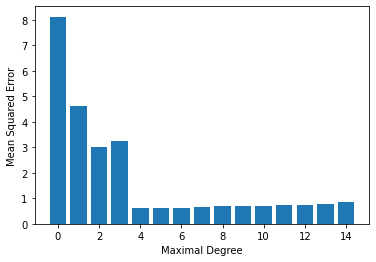

In [85]:
plt.bar(degs, MSEs)
plt.xlabel('Maximal Degree')
plt.ylabel('Mean Squared Error')

Prediction error is high for low degre value and decreases sharply as we increase the degree value till the value of 4 and remains stable for some values and then starts increasing very gradually.<br>
Based on our observation, we will chose degree=4 as it gives least MSE. We have picked value 4 even though we have same MSE for values 4,5,6 to avoid extra parameters and also to avoid overfitting.

In [86]:
from utilities import split_data_around_point
data_ap = split_data_around_point(x, y, x_0=0.9)

### Evaluation (splits)
We compare the effect of the two different splits on the generalisation error.

Text(0, 0.5, 'Mean Squared Error')

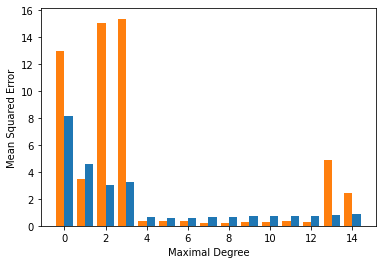

In [87]:
MSEs_ap = np.r_[[evaluate_model_on_dataset(data_ap, deg) for deg in degs]]
plt.bar(degs+.2, MSEs, width=.4)
plt.bar(degs-.2, MSEs_ap, width=.4)
plt.xlabel('Maximal Degree')
plt.ylabel('Mean Squared Error')

Prediction error for split_data_around_point() is much higher than split_data() for low degree values and high degree values whereas for in between values of degree split_data_around_point()'s error is lower than split_data()'s error.<br>
Based on our observation, split_data_around_point() looks good choice for splitting training and test data in given dataset as it gives less MSE for degree value 4 as compared to split_data().